In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb1
import pickle
import time
from sklearn.metrics import mean_absolute_error

In [2]:
#seperating categorical and continuous features
def features(df):
    categorical_features=[]
    continuous_features=[]
    for i in df.columns:
        if i[:3]=='cat':
            categorical_features.append(i)
        elif i[:4]=='cont':
            continuous_features.append(i)
    return categorical_features,continuous_features

In [3]:
def function1(datapoint):
    train_data=pd.read_csv('train.csv')
    test_data=pd.read_csv('test.csv',nrows=1)
    test_data.loc[len(test_data)]=datapoint
    test_data['loss'] = np.nan
    combined_data = pd.concat([train_data, test_data])
    categorical_train_features,continuous_train_features=features(train_data)
    categorical_test_features,continuous_test_features=features(test_data)
    def search_feature(x):
        if x in combined_remaining:
            return np.nan
        return 
    for i in categorical_train_features:
        if train_data[i].nunique() != test_data[i].nunique():
            train_unique_set = set(train_data[i].unique())
            test_unique_set  = set(test_data[i].unique())
            remaining_train  = train_unique_set - test_unique_set
            remaining_test   = test_unique_set - train_unique_set
            combined_remaining = remaining_train.union(remaining_test)
            combined_data[i] = combined_data[i].apply(lambda x: search_feature(x),1)
        combined_data[i] = pd.factorize(combined_data[i].values,sort = True)[0]
    x_train = combined_data[combined_data['loss'].notnull()]
    x_test = combined_data[combined_data['loss'].isnull()]
    y_train = np.log(x_train['loss']+100)
    x_train = x_train.drop(['loss','id'],axis = 1)
    x_test  = x_test.drop(['loss','id'],axis = 1)
    d_train = xgb1.DMatrix(x_train, label=y_train)
    d_test =  xgb1.DMatrix(x_test)
    
    model= pickle.load(open("XGBOOST_FINAL_SUBMISSION_MODEL.pkl", "rb"))
    prediction = np.exp(model.predict(d_test)) - 100
    prediction = prediction[-1]
    return prediction

In [4]:
start = time.time()
datapoint=[4,'A','B','A','A','A','A','A','A','B','A','B','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A',
           'A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A',
           'A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','D','B','B','D',
           'D','B','B','C','B','D','B','A','A','A','A','A','D','C','C','E','C','D','T','H','G','A','A','G','E','I','L',
           'K','BI','BC','A','J','AX','A','Q','HG',0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,
           0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562]

prediction=function1(datapoint)
print("prediction for the datapoint:",prediction)
end = time.time()
time_to_execute=end-start
print("Time taken for one datapoint in sec:",time_to_execute)

prediction for the datapoint: 954.89087
Time taken for one datapoint in sec: 16.91822338104248


In [5]:
def function2(datapoint,loss):
    train_data=pd.read_csv('train.csv')
    test_data=pd.read_csv('test.csv',nrows=1)
    test_data.loc[len(test_data)]=datapoint
    test_data['loss'] = np.nan
    combined_data = pd.concat([train_data, test_data])
    categorical_train_features,continuous_train_features=features(train_data)
    categorical_test_features,continuous_test_features=features(test_data)
    def search_feature(x):
        if x in combined_remaining:
            return np.nan
        return 
    for i in categorical_train_features:
        if train_data[i].nunique() != test_data[i].nunique():
            train_unique_set = set(train_data[i].unique())
            test_unique_set  = set(test_data[i].unique())
            remaining_train  = train_unique_set - test_unique_set
            remaining_test   = test_unique_set - train_unique_set
            combined_remaining = remaining_train.union(remaining_test)
            combined_data[i] = combined_data[i].apply(lambda x: search_feature(x),1)
        combined_data[i] = pd.factorize(combined_data[i].values,sort = True)[0]
    x_train = combined_data[combined_data['loss'].notnull()]
    x_test = combined_data[combined_data['loss'].isnull()]
    y_train = np.log(x_train['loss']+100)
    x_train = x_train.drop(['loss','id'],axis = 1)
    x_test  = x_test.drop(['loss','id'],axis = 1)
    d_train = xgb1.DMatrix(x_train, label=y_train)
    d_test =  xgb1.DMatrix(x_test)
    
    model= pickle.load(open("G:/All State Claims Severity Prediction/XGBOOST_FINAL_SUBMISSION_MODEL.pkl", "rb"))
    prediction = np.exp(model.predict(d_test)) - 100
    prediction = prediction[-1]
    mae = np.abs(loss-prediction)
    return prediction,mae

In [6]:
start = time.time()
datapoint= [1,'A','B','A','B','A','A','A','A','B','A','B','A','A','A','A','A','A','A','A','A','A','A','B','A','A','A',
            'A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A',
            'A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','A','D','B','B','D',
            'D','B','D','C','B','D','B','A','A','A','A','A','D','B','C','E','A','C','T','B','G','A','A','I','E','G','J',
            'G','BU','BC','C','AS','S','A','O','LB',0.7263,0.245921,0.187583,0.789639,0.310061,0.718367,0.33506,0.3026,
            0.67135,0.8351,0.569745,0.594646,0.822493,0.714843]
prediction,mae=function2(datapoint,2213.18)
print("prediction for the datapoint:",prediction)
print("error for the datapoint:",mae)
end = time.time()
time_to_execute=end-start
print("Time taken for one datapoint in sec:",time_to_execute)

prediction for the datapoint: 947.34863
error for the datapoint: 1265.8313671874998
Time taken for one datapoint in sec: 16.0285701751709


#### Deployment Screenshots

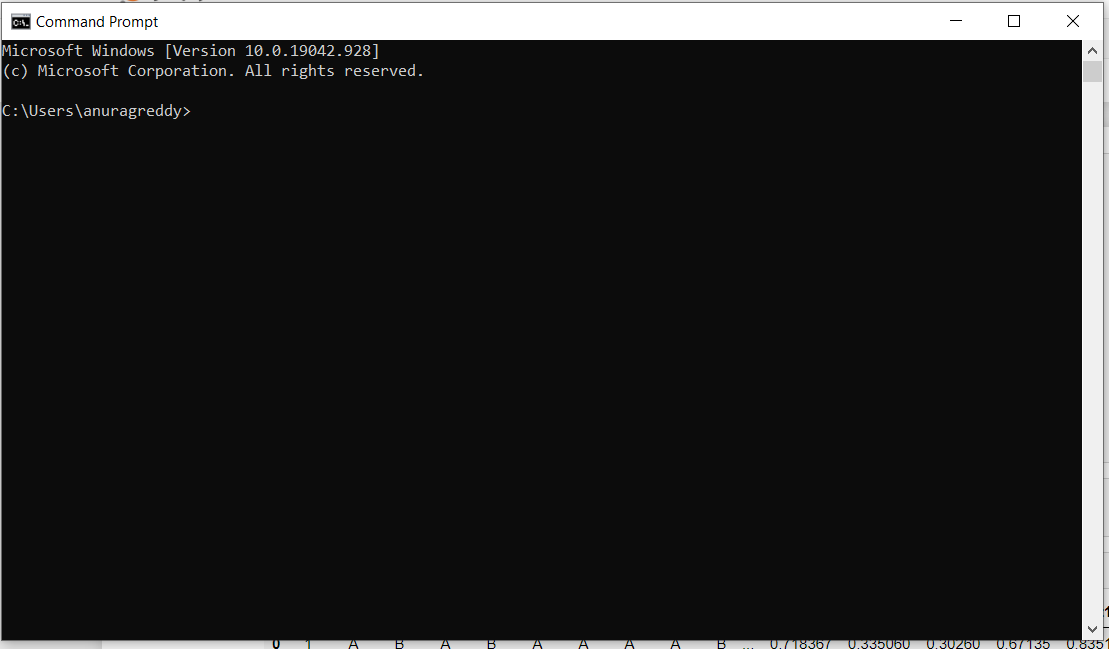

In [7]:
from IPython.display import Image
Image(filename='deployment_screenshot1.png')

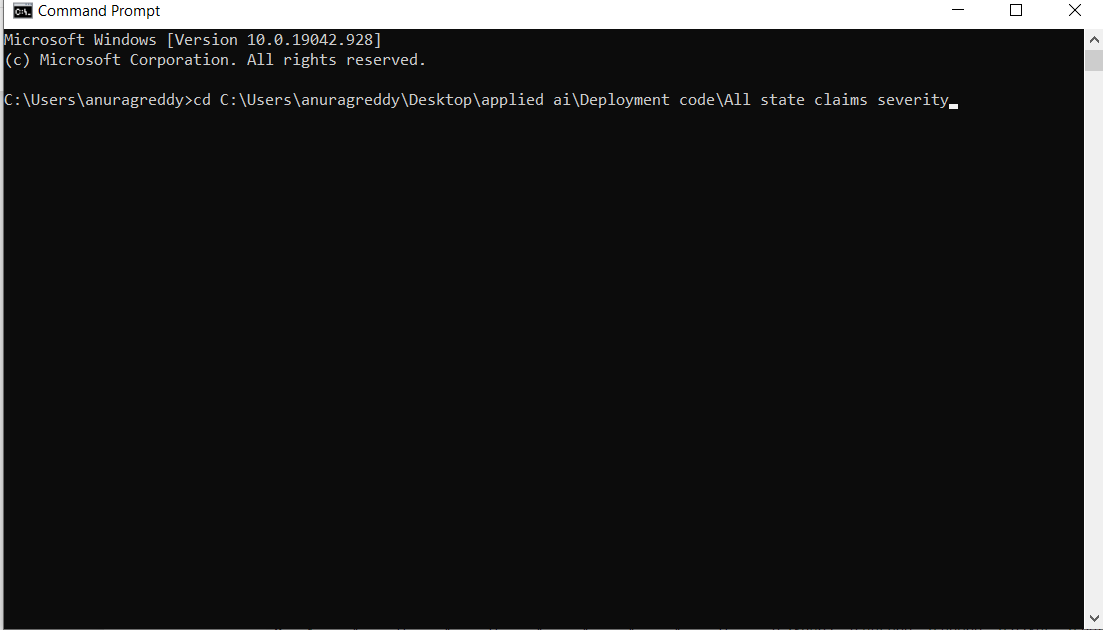

In [9]:
from IPython.display import Image
Image(filename='deployment_screenshot2.png')

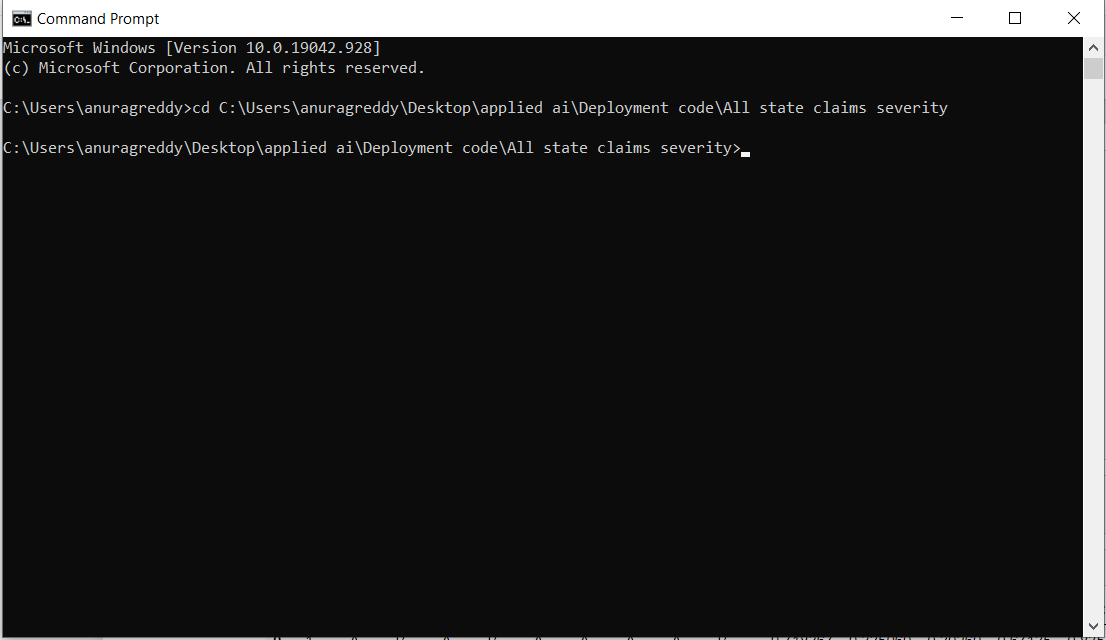

In [13]:
from IPython.display import Image
Image(filename='deployment_screeshot3.png')

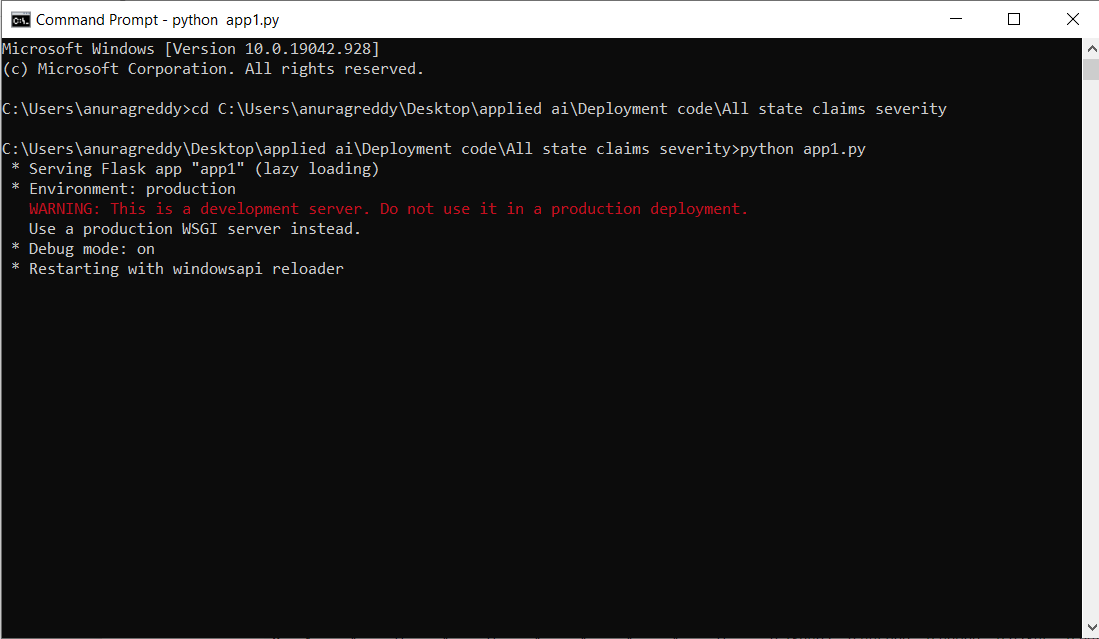

In [14]:
from IPython.display import Image
Image(filename='deployment_screeshot4.png')

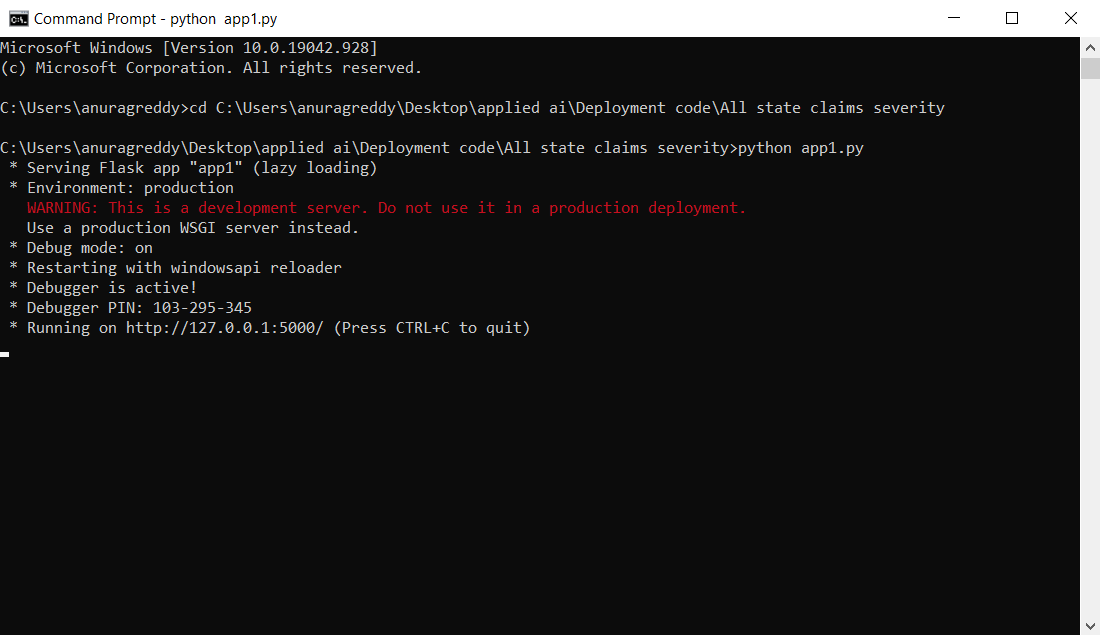

In [12]:
from IPython.display import Image
Image(filename='deployment_screenshot5.png')

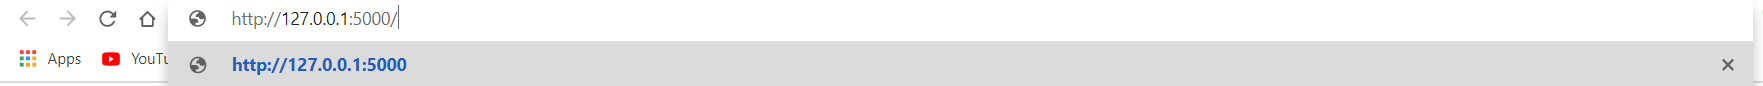

In [15]:
from IPython.display import Image
Image(filename='deployment_screenshot6.png')

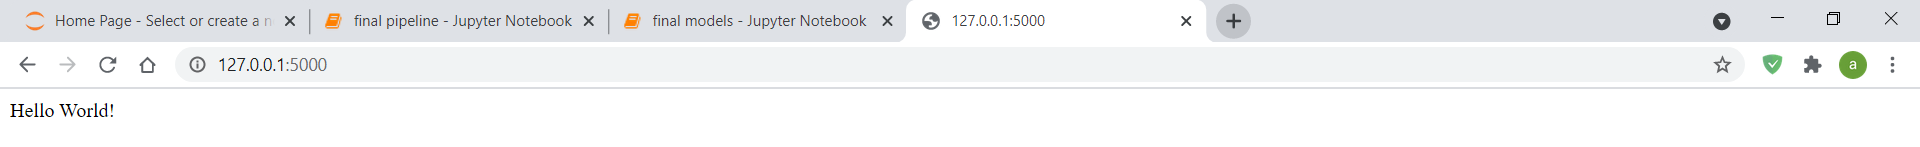

In [16]:
from IPython.display import Image
Image(filename='deployment_screenshot7.png')

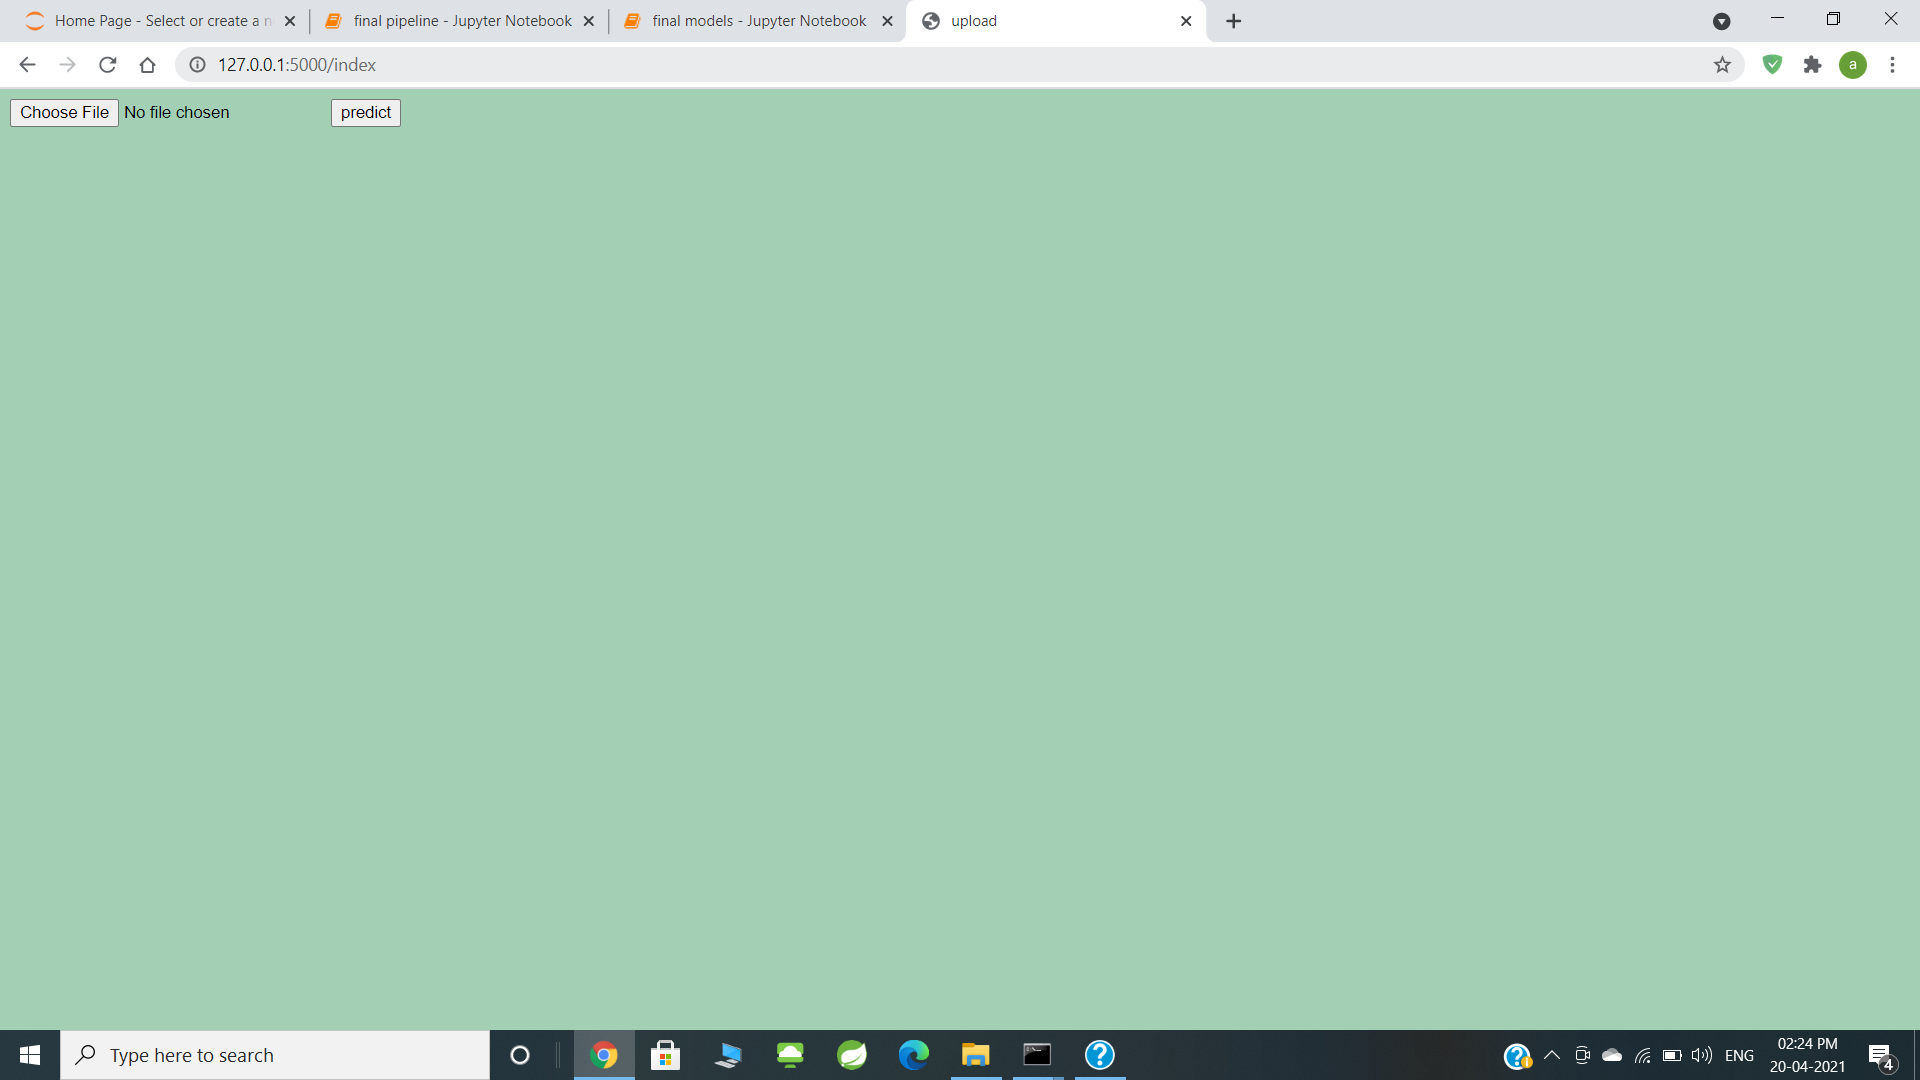

In [17]:
from IPython.display import Image
Image(filename='deployment_screenshot8.png')

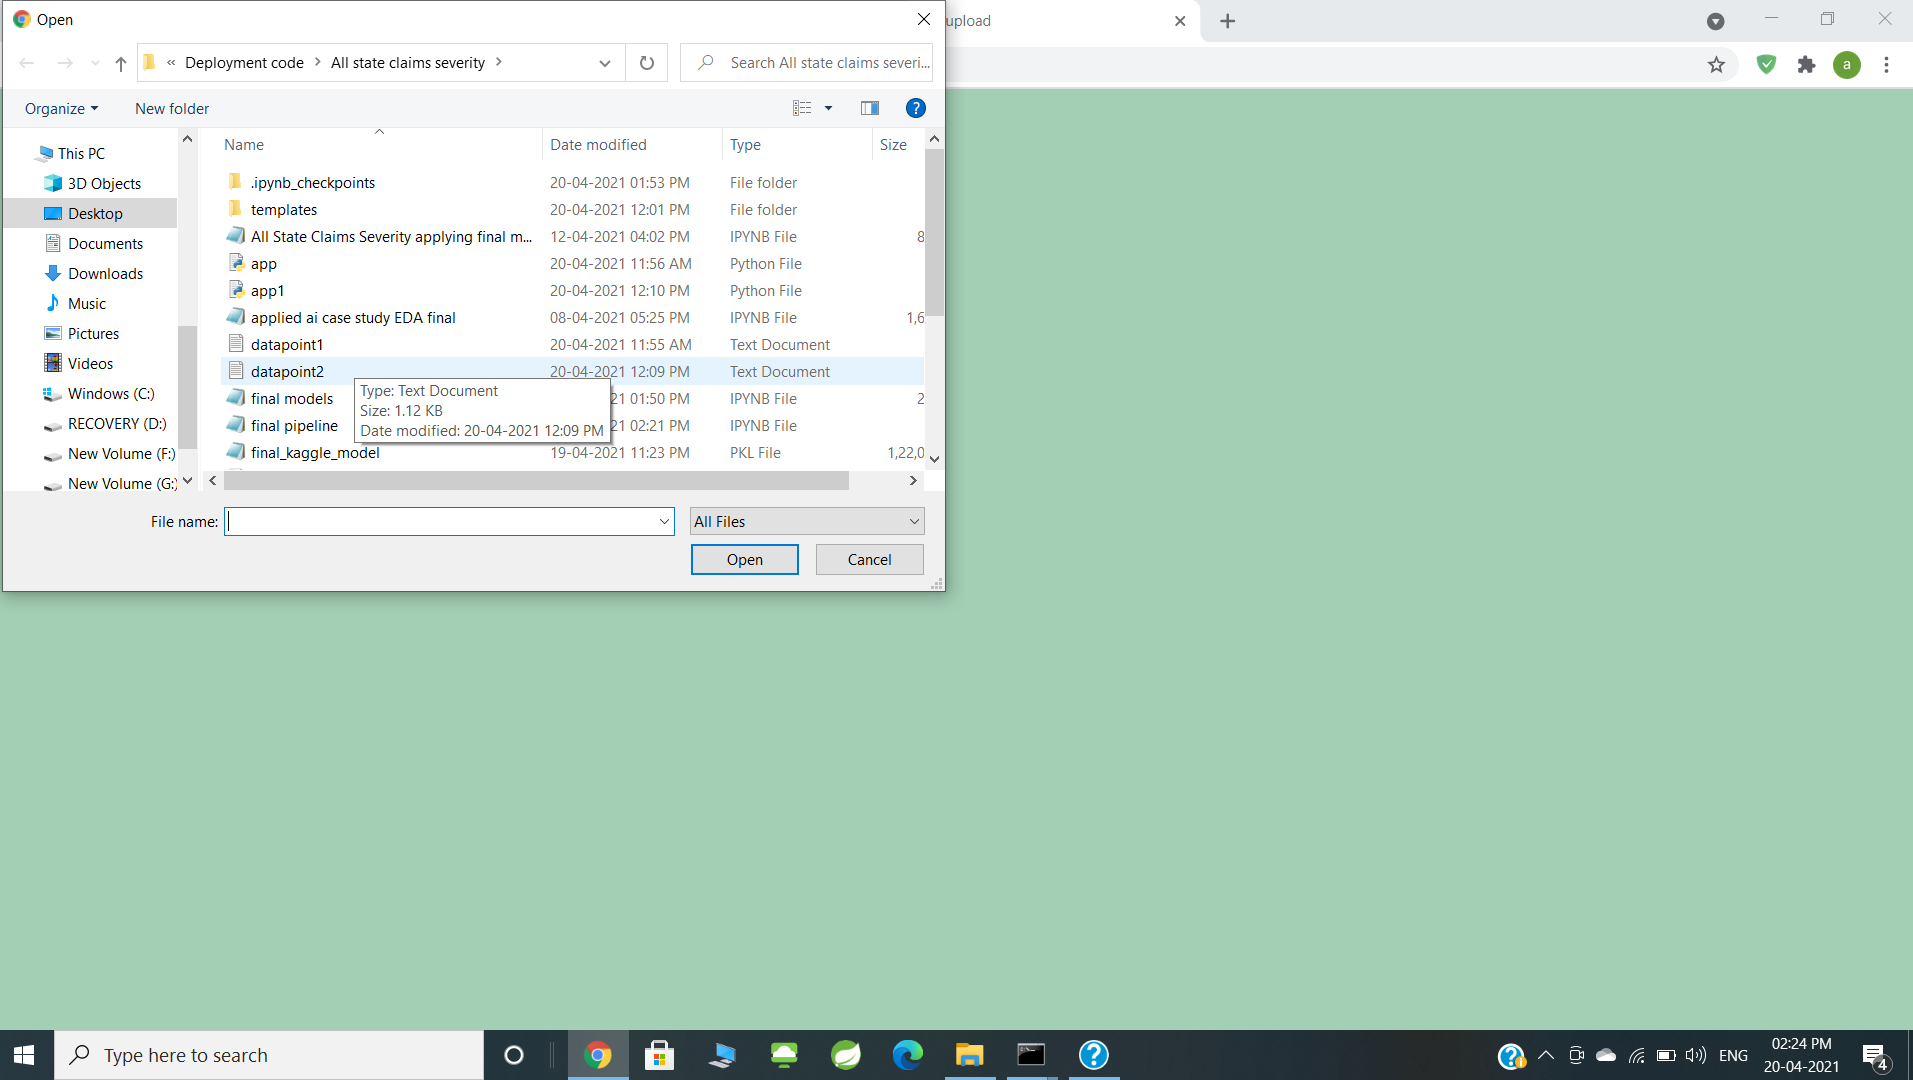

In [18]:
from IPython.display import Image
Image(filename='deployment_screenshot9.png')

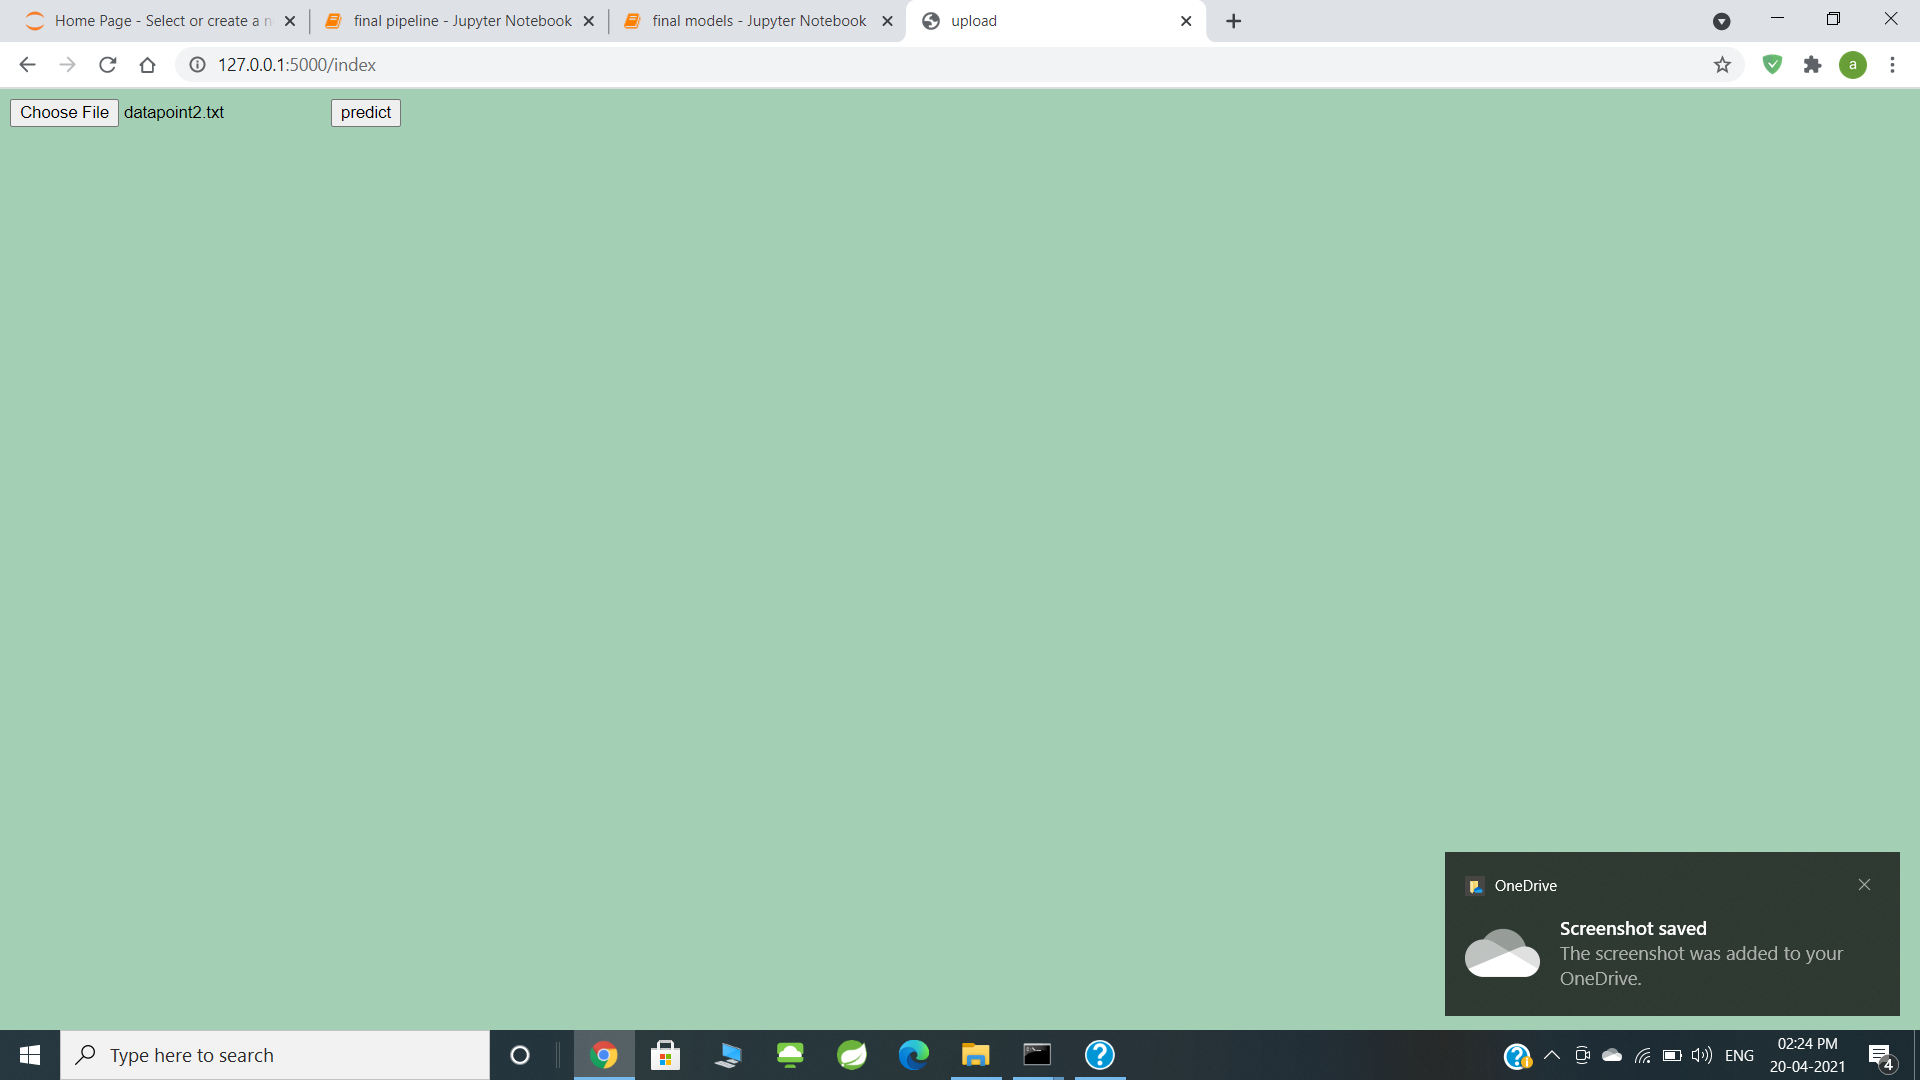

In [19]:
from IPython.display import Image
Image(filename='deployment_screenshot10.png')

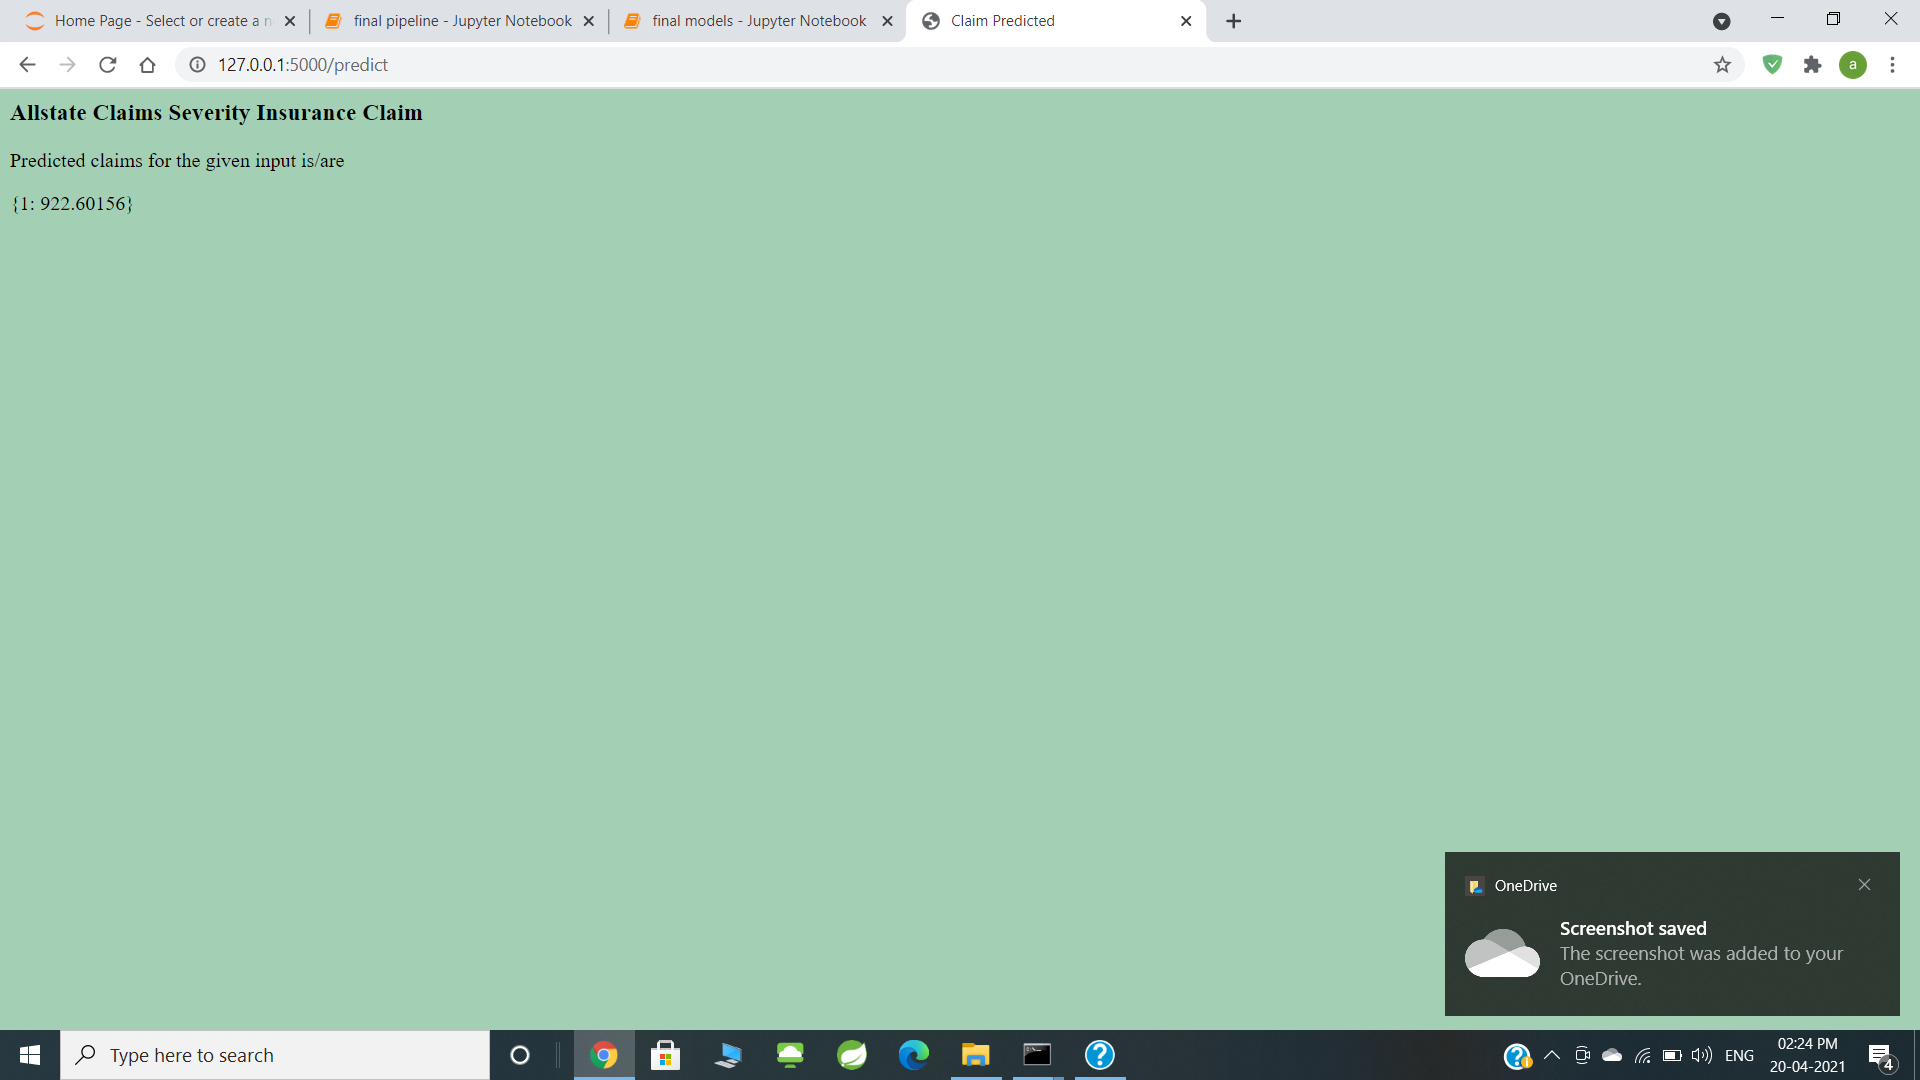

In [20]:
from IPython.display import Image
Image(filename='deployment_screenshot11.png')

#### Youtube:https://www.youtube.com/watch?v=9-cf4-V-t3s